## Разработка моделей прогнозирования


<p> В этом разделе мы разработаем несколько моделей, которые будут предсказать цену автомобиля, используя переменные или функции.Это всего лишь оценка, но должна дать нам объективное представление о том, сколько стоит автомобиль. </P>


Некоторые вопросы, которые мы хотим задать в этом модуле
<ul>
    <li> Знаю ли я, предлагает ли дилер справедливую стоимость для моего обмена? </li>
    <li> Знаю ли я, если я выражу справедливую ценность на свою машину? </li>
</ul>
<p> В аналитике данных мы часто используем разработку модели <b>, чтобы помочь нам предсказать будущие наблюдения из данных, которые у нас есть. </p>.

<p> Модель поможет нам понять точную связь между различными переменными и тем, как эти переменные используются для прогнозирования результата. </p>


<h4>Setup</h4>


Импорт библиотеки:


In [159]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
# mamba install sklearn=0.20.1-y
# импортирую обновленный сиборн 


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Загрузите данные и сохраните их в DataFrame `df`:


In [161]:
# path of data 
df = pd.read_csv('C:/Users/admin/Desktop/python repo/DataAnalysis/Labs/clean_df.csv')
df.head()


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,17450.0,13.055556,10.681818,Low,0,1,1,0


# описание столбцов в сете данных:
 
марка автомобиля **(Make)**

аспирация **(aspiration)**

количество дверей **(num-of-doors)**

стиль кузова **(body-style)**

ведущие колеса	**(drive-wheels)**

расположение двигателя (**engine-location)**

колёсная база 	**(wheel-base)**

длина автомобиля **(length)**

степень сжатия	двигателя **(compression-ratio)**

лошадиная сила автомобиля	**(horsepower)**

пиковые обороты	**(peak-rpm)**

расход топлива на 100 км по городу	**(city-L/100km)**

расход топлива на 100 км по шоссе	**(highway-L/100km)**

цена автомобиля	**(price)**

мощность в лошадиных силах	**(horsepower-binned)** что то типа рейтинга, в градация мало, много, средне, относительно количественного показателя выборки в столбце лошадиные силы

дизель	**(diesel)** - дизельный автомобиль

газ **(gas)** - автомобиль на газу 

<h2> 1.Линейная регрессия и множественная линейная регрессия </h2>


<h4> Линейная регрессия </h4>


<p> Один пример модели данных, которую мы будем использовать: </p>
<b> простая линейная регрессия </b>

<br>
<p> Простая линейная регрессия - это метод, который поможет нам понять взаимосвязь между двумя переменными: </p>
<ul>
    <li> Предиктор/независимая переменная (x) </li>
    <li> Ответ/зависимая переменная (которую мы хотим предсказать) (y) </li>
</ul>

<p> Результатом линейной регрессии является линейная функция <b> </b>, которая предсказывает переменную ответа (зависимая) как функция переменной предиктора (независимой). </p>



$$
 Y: Response \ Variable\\\\
 X: Predictor \ Variables
$$


 <b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li> <b> А </b> относится к <b> intercept </b> линии регрессии, другими словами: <b>значение y, когда x - 0</b>  </li>
    <li> <b> В </b> относится к <b> наклону (SLOPE) линии регрессии</b>, другими словами: значение, с которым <b> y </b> меняется, когда <b> x </b> увеличивается на 1 единицу </li>
</ul>

<h4> Давайте загрузим модули для линейной регрессии: </h4>

если библиотека не загружена то:  pip install scikit-learn


In [162]:
from sklearn.linear_model import LinearRegression

<h4> создать объект линейной регрессии: </h4>

In [163]:
lm = LinearRegression()
lm

LinearRegression()

<h4> Как «Шоссе-MPG» может помочь нам предсказать цену автомобиля? </h4>


Для этого примера мы хотим взглянуть на то, как highway-L/100km может помочь нам предсказать цену автомобиля.
Используя простую линейную регрессию, мы создадим линейную функцию с «highway-L/100km» в качестве переменной предиктора и «цена» в качестве переменной отклика.


In [164]:
X = df[['highway-L/100km']]
Y = df[['price']]

Установите линейную модель, используя highway-L/100km:


In [165]:
lm.fit(X,Y)

LinearRegression()

# Мы можем вывести прогноз  

ВВЕДЕМ ПАРАМЕТР ограничения  вывода  первыми пятью занчениями. **(X[0:5]отобразит первые 5 значений X . Y[0:5]отобразит первые 5 значений Y)**

ТО ЕСТЬ, наш прогноз выдаст первые 5 спрогнозированных значений цены:

In [166]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([[15503.87297521],
       [15503.87297521],
       [16660.76475578],
       [12495.95434571],
       [22340.05167861]])

<h4> Каково значение у в тот момент когда х равен нулю относительно нашей модели? ( intercept - перехват, прямой отрезок) (a)? </h4>


In [167]:
lm.intercept_

array([-14575.31331976])

<h4> Каково значение наклона (slope) (b)? </h4>


In [168]:
lm.coef_

array([[3455.90651049]])

<h3> Какую окончательную линейную модель мы получаем? </h3>

воспользуемся формулой 


Как мы видели выше, мы должны получить последнюю линейную модель со структурой:


$$
Yhat = a + b  X
$$


<Axes: xlabel='highway-L/100km', ylabel='price'>

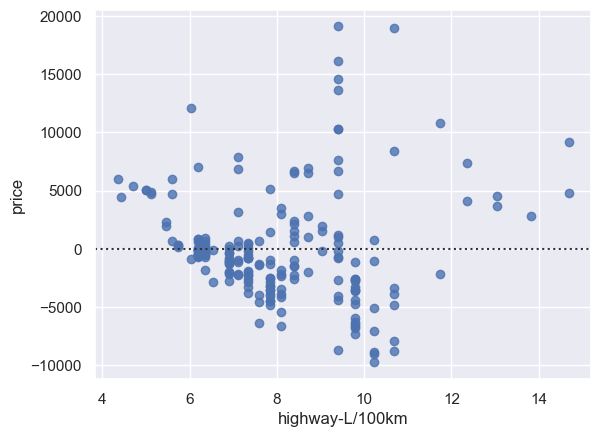

In [169]:
sns.residplot(x="highway-L/100km", y="price", data=df)

<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 1 а): </h1>

<b> создать объект линейной регрессии под названием «LM1». </b>
</div>


In [170]:
LM1  = LinearRegression()
LM1

LinearRegression()

<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 1 b): </h1>

<b> тренировать модель, используя «размер двигателя» в качестве независимой переменной и «цена» в качестве зависимой переменной? </b>
</div>

In [171]:
# engine-size будет предиктором, предстказываемым значением как всегда будет цена
x = df[['engine-size']]
y = df ['price']
# тренируем линейную модель 
LM1.fit(x,y)
LM1


LinearRegression()

<details><summary>Второй вариант, без переменных - напрямую вписывать имя столбца</summary>

```python
lm1.fit(df[['engine-size']], df[['price']])
lm1
```

</details>



<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 1 c): </h1>

<b> Найдите наклон и перехват модели. </b>
</div>


<h4>Slope</h4>

ОБЬЕКТ ЛИНЕЙНОЙ РЕГРЕССИИ НАЗЫВАЕТСЯ LM1  И ПЕРЕМЕННАЯ КОТОРАЯ ПРИСВОЕНА ЦЕНЕ ЭТО маленькая **х**

опять же ограничимся 5 значениями Yhat[0:5]

In [172]:
Yhat=LM1.predict(x)
Yhat[0:5]
LM1.coef_   

array([166.99398606])

<h4>Intercept </h4> для обьекта линейной регрессии LM1


In [173]:
# 
LM1.intercept_

-7935.433267801038

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Вопрос № 1 D): </h1>

<b> Каково уравнение предсказанной линии?Вы можете использовать x и yhat или «размер двигателя» или «цена». </B>
</div>

In [174]:
# Yhat = LM1.intercept_   + LM1.coef_ + столбец предиктора
Yhat=-7935.433267801038 + 166.99398606 * X

Price=-7935.433267801038 + 166.99398606* df['engine-size']
Price

0      13773.784920
1      13773.784920
2      17447.652613
3      10266.911213
4      14775.748836
           ...     
196    15610.718767
197    15610.718767
198    20954.526321
199    16278.694711
200    15610.718767
Name: engine-size, Length: 199, dtype: float64

# Множественная линейная регрессия


<p> Что если мы хотим предсказать цену автомобиля, используя более одной переменной? </p>

<p> Если мы хотим использовать больше переменных в нашей модели для прогнозирования цены на автомобиль, мы можем использовать <b> несколько линейных регрессий </b>.
Множественная линейная регрессия очень похожа на простую линейную регрессию, но этот метод используется для объяснения взаимосвязи между 

одной переменной непрерывной реакции (зависимой) и <b> двумя или более </b> предикторами (независимыми) переменными.
Большинство реальных регрессионных моделей включают несколько предикторов.

Мы проиллюстрируем структуру, используя четыре переменные предиктора, но эти результаты могут обобщить на любое целое число: </p>

$$
Y: Response \ Variable\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


Уравнение дано:


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p> Из предыдущего раздела мы знаем, что другие хорошие предикторы цен могут быть: </p>
<ul>
    <li> Мощность </li>
    <li> вес без груза и пасажиров </li>
    <li> Размер двигателя </li>
    <li> Расход по шоссе </li>
</ul>
Давайте разработаем модель, используя эти переменные в качестве переменных предиктора
положим все нужные переменные в одну переменную Z

In [175]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

Установите линейную модель, используя четыре вышеупомянутые переменные.


In [176]:
lm.fit(Z, df['price'])

LinearRegression()

Каково значение перехвата (а)?


In [177]:
lm.intercept_

-14285.462035057453

Каковы значения коэффициентов (B1, B2, B3, B4)?


In [178]:
lm.coef_

array([ 37.05518795,   3.50307288,  85.95034797, 477.40895986])

 Какова конечная предполагаемая линейная модель, которую мы получаем?


Как мы видели выше, мы должны получить последнюю линейную функцию со структурой:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Какая линейная функция мы получаем в этом примере?


<b>Price</b> = -14285.46 + 37.05518795 * <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 2 а): </h1>
Создайте и тренируйте модель множественной линейной регрессии «LM2», где переменная отклика «цена», а переменная предиктора-«нормализованные потери» и «шоссе-MPG».
</div>

In [179]:
# Write your code below and press Shift+Enter to execute 
lm2 = LinearRegression()
lm2

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


```

</details>



<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 2 B): </h1>
<b> Найдите коэффициент модели. </b>
</div>


In [180]:
# Write your code below and press Shift+Enter to execute 

Mult_reg_x = df[["normalized-losses","highway-L/100km"]]
lm2.fit(Mult_reg_x,df['price'])
lm2.coef_

array([   3.79680486, 3440.51321586])

<details><summary>Click here for the solution</summary>

```python
lm2.coef_

```

</details>



<h2> 2.Оценка модели с использованием визуализации </h2>


Теперь, когда мы разработали несколько моделей, как мы оцениваем наши модели и выбираем лучшие?Один из способов сделать это - использовать визуализацию.


Импортируйте пакет визуализации, Seaborn:


In [181]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>


<p> Когда дело доходит до простой линейной регрессии, отличный способ визуализации соответствия нашей модели - использование графиков регрессии <b> </b>. </p>

<p> На этом графике будет показана комбинация разбросанных точек данных (A <b> Scatterplot </b>), а также установленную линейную регрессию </b>, проходящую через данные.Это даст нам разумную оценку взаимосвязи между двумя переменными, силой корреляции, а также направления (положительная или отрицательная корреляция). </P>

Давайте визуализируем ** расход топлива на 100 км** как потенциальная переменная предиктора цены:


(0.0, 47711.7554955814)

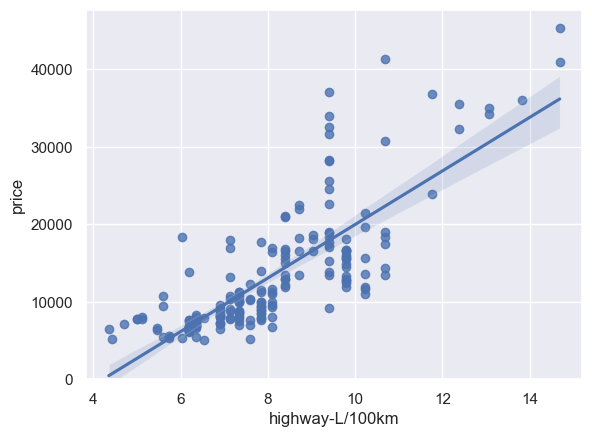

In [182]:

sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)


<p> Из этого графика мы видим, что цена положительно коррелирует с расходом топлива, поскольку наклон регрессии положителен.

При рассмотрении сюжета регрессии есть одна вещь, чтобы обратить внимание на то, насколько разбросаны точки данных вокруг линии регрессии.Это даст вам хорошее представление о дисперсии данных и будет ли линейная модель лучше всего подходит или нет.

Если данные слишком далеко от линии, эта линейная модель может быть не лучшей моделью для этих данных.

Давайте сравним этот график с графиком регрессии «Пик-RPM». </P>


(0.0, 47414.1)

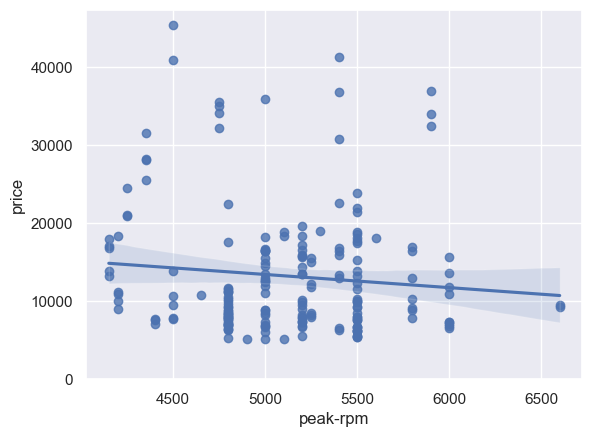

In [183]:

sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p> Сравнивая график регрессии «peak-RPM» и «highway-l/100km», мы видим, что точки для «highway-l/100km» намного ближе к генерируемой линии и, в среднем, уменьшаются. Точки для «peak RPM» имеют больше распространения вокруг прогнозируемой линии, и гораздо сложнее определить, уменьшаются ли точки или увеличиваются по мере увеличения «peak RPM». </P>


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 3: </h1>
<b>, учитывая графики регрессии выше, является ли «пик-RPM» или «расход топлива по шоссе» более сильно коррелирует с «ценой»?Используйте метод ".corr ()", чтобы проверить свой ответ. </B>
</div>


In [184]:

df[['peak-rpm', 'highway-L/100km','price']].corr()

,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017741,-0.101649
highway-L/100km,0.017741,1.000000,0.801059
price,-0.101649,0.801059,1.000000


 Переменная "highway-l/100km" имеет более сильную корреляцию с "ценой", она составляет приблизительно 0,8 по сравнению с "peak-rpm", которая составляет приблизительно -0,101616. 

<h3> остаточный график </h3>

<p> Хороший способ визуализации дисперсии данных - использовать остаточный график. </p>

<p> Что такое <b> остаточный </b>? </p>

<p> Разница между наблюдаемым значением (Y) и прогнозируемым значением (Yhat) называется остаточным (E).Когда мы смотрим на график регрессии, остаток - это расстояние от точки данных до установленной линии регрессии. </P>

<p> Итак, что такое остаточный график <b> </b>? </p>

<p> остаточный график-это график, который показывает остатки на вертикальной оси Y и независимая переменная на горизонтальной оси x. </p>

<p> На что мы обращаем внимание на остаточный сюжет? </p>

<p> мы смотрим на распространение остатков: </p>

<p>- Если точки в остаточном графике <b> случайным образом распределены вокруг оси x, то для данных подходит линейная модель <b> </b>.

Почему это?Случайно распределение остатков означает, что дисперсия постоянна, и, следовательно, линейная модель подходит для этих данных. </P>

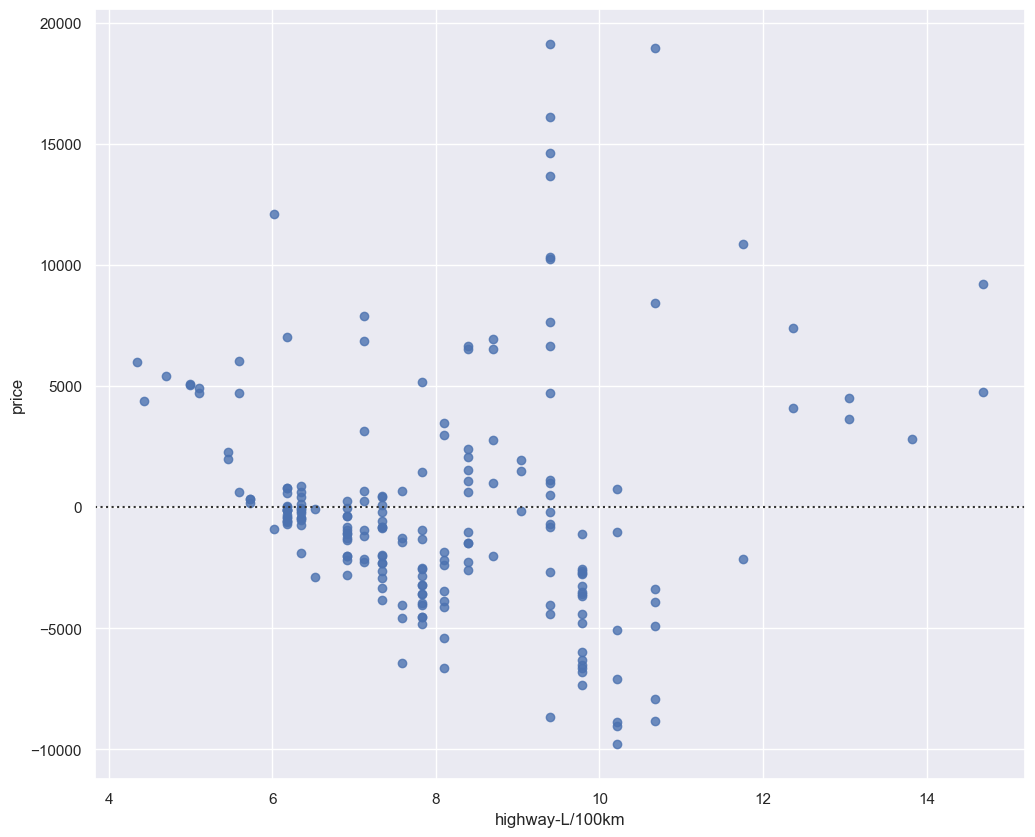

In [185]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-L/100km'], y=df['price'])
plt.show()

<i> Что этот сюжет говорит нам? </i>

<p> Из этого остаточного графика мы видим, что остатки не распространяются по оси x, что заставляет нас полагать, что, возможно, нелинейная модель более подходит для этих данных. </p>.


<h3>Multiple Linear Regression</h3>


<p> Как нам визуализировать модель для множественной линейной регрессии?Это становится немного сложнее, потому что вы не можете визуализировать его с регрессией или остаточным сюжетом. </P>

<p> Один из способов взглянуть на соответствие модели - посмотреть на график распределения <b> </b>.Мы можем посмотреть на распределение подходящих значений, которые возникают из модели, и сравнить его с распределением фактических значений. </P>


Во -первых, давайте сделаем прогноз:


In [186]:
Y_hat = lm.predict(Z)

C:\Users\admin\AppData\Local\Temp/ipykernel_16692/2674931251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\admin\AppData\Local\Temp/ipykernel_16692/2674931251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a

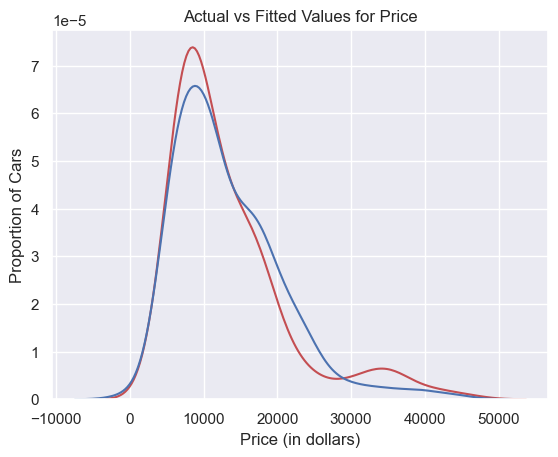

In [187]:

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
ax = sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p> Мы видим, что подходящие значения достаточно близки к фактическим значениям, поскольку два распределения немного перекрываются.Тем не менее, определенно есть место для улучшения. </P>


<h2> 3.Полиномиальная регрессия и конвейер </h2>


<p> <b> Полиномиальная регрессия </b> - это конкретный случай общей модели линейной регрессии или нескольких моделей линейной регрессии. </p>
<p> Мы получаем нелинейные отношения, квадратируя или установив условия более высокого порядка переменных предиктора. </p>

<p> Существуют разные порядки полиномиальной регрессии: </p>


<Chenter> <b> квадратичный - 2 -й порядок </b> </chenter>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<Chenter> <b> кубический - 3 -й порядок </b> </chenter>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3
$$


<Chenter> <b> высший порядок </b>: </chenter>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 
$$


<p> Ранее мы видели, что линейная модель не обеспечила наилучшего соответствия при использовании «расхода топлива по шоссе» в качестве переменной предиктора.Посмотрим, сможем ли мы попробовать подготовить полиномиальную модель для данных вместо этого. </P>


<p> Мы будем использовать следующую функцию для построения данных: </p>


In [188]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(5, 15, 30)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Давайте получим переменные:


In [189]:
x = df['highway-L/100km']
y = df['price']

Давайте подгоняем многочлен, используя функцию <b> polyfit </b>, затем используйте функцию <b> poly1d </b> для отображения полиномиальной функции.


In [190]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-22.88 x + 907.9 x - 6937 x + 2.11e+04


Давайте построим функцию:


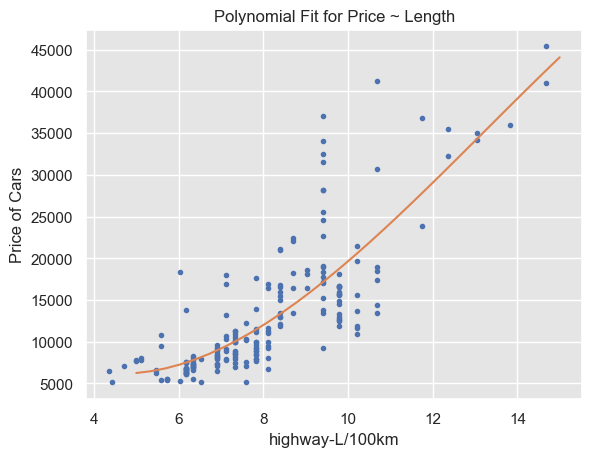

In [191]:
PlotPolly(p, x, y,'highway-L/100km')

In [192]:
np.polyfit(x, y, 3)

array([  -22.88104602,   907.88893794, -6936.68197809, 21097.91112568])

<p> Мы уже можем видеть на графике, что эта полиномиальная модель работает лучше, чем линейная модель.Это связано с тем, что   в сгенерированную полиномиальную функцию "попадает" больше точек данных. </P>


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 4: </h1>
<b> Создать 11 -х порядок полиномиальной модели с переменными x и y свыше. </b>
</div>


          11          10         9         8             7            6
0.003537 x  - 0.4724 x  + 26.83 x - 869.1 x + 1.801e+04 x - 2.52e+05 x
              5             4             3             2
 + 2.438e+06 x - 1.635e+07 x + 7.464e+07 x - 2.211e+08 x + 3.83e+08 x - 2.941e+08


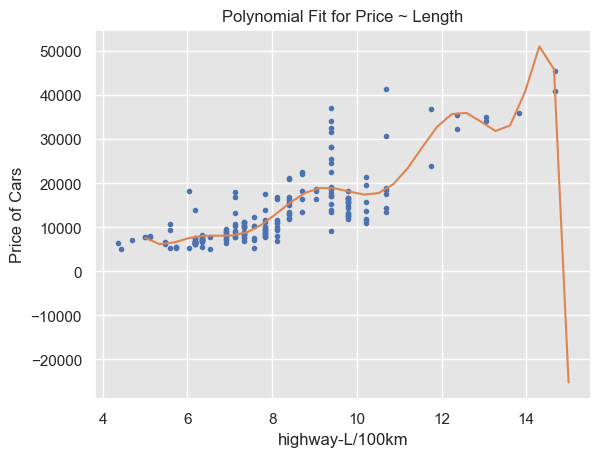

In [193]:
# Write your code below and press Shift+Enter to execute 
f1  = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x,y,'highway-L/100km')


<details><summary>Click here for the solution</summary>

```python
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

```

</details>



<p> Аналитическая экспрессия для многомерной полиномиальной функции усложняется.Например, выражение для полинома второго порядка (степень = 2) с двумя переменными определяется как: </p>


$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


Мы можем выполнить полиномиальное преобразование в нескольких функциях.Сначала мы импортируем модуль:


In [194]:
from sklearn.preprocessing import PolynomialFeatures

Мы создаем <b> полиномиал свойства </b> объект степени 2:


In [195]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [196]:
Z_pr=pr.fit_transform(Z)

В исходных данных есть 199 образцы и 4 функции.


In [197]:
Z.shape

(199, 4)

После преобразования есть 201 образцы и 15 функций.


In [198]:
Z_pr.shape

(199, 15)

<h2>Pipeline</h2>


<p> Трубопроводы данных упрощают шаги обработки данных.Мы используем модуль <b> Pipeline </b> для создания конвейера.Мы также используем <b> standardscaler </b> в качестве шага в нашем конвейере (pipeline). </P>


In [199]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Мы создаем конвейер, создав список кортежей, включая название модели или оценки и его соответствующий конструктор.


In [200]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Мы вводим список в качестве аргумента в конструктор конвейера:


In [201]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Во -первых, мы преобразуем тип данных типа Z в тип Float, чтобы избежать предупреждений о преобразовании, которые могут появиться в результате того, что стандарты принимают входные данные.

Затем мы можем нормализовать данные, выполнить преобразование и подгонять модель одновременно.


In [202]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Точно так же мы можем нормализовать данные, выполнить преобразование и одновременно произвести прогноз.


In [203]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12441.37030435, 12441.37030435, 18470.6469597 , 10019.83749456])

<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 5: </h1>
<b> Создайте конвейер, который стандартизирует данные, а затем создает прогноз, используя модель линейной регрессии, используя функции Z и Target y. </b>
</div>

In [204]:
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe1=Pipeline(Input)

pipe1.fit(Z,y)

ypipe=pipe1.predict(Z)
ypipe[0:10]


array([14082.26490685, 14082.26490685, 18689.70707731, 10789.13991592,
       16657.40543816, 14749.70390903, 15930.23947117, 16315.57748849,
       18581.79806371, 10998.26790105])

<details><summary>Click here for the solution</summary>

```python
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

```

</details>



<h2> 4.Меры для оценки в выборке </h2>


<p> При оценке наших моделей мы не только хотим визуализировать результаты, но и мы также хотим, чтобы количественная мера определила, насколько точна модель. </p>.

<p> Две очень важные меры, которые часто используются в статистике для определения точности модели: </p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, Также известен как коэффициент определения, является мерой, чтобы указать, насколько близки данные к установленной линии регрессии.</p>
    
<p>Значение R-квадрата-это процент изменения переменной отклика (Y), которая объясняется линейной моделью./p>



<b>Mean Squared Error (MSE)</b>

<p>Средняя квадратная ошибка измеряет среднее значение квадратов ошибок.То есть разница между фактическим значением (y) и оцененным значением (ŷ). </P>


<h3> Модель 1: Простая линейная регрессия </h3>


Давайте рассчитаем R^2:


In [205]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6416950471524439


Можно сказать, что ~ 64,19% от изменения цены объясняется этой простой линейной моделью "Horsepower_fit".


Давайте рассчитаем MSE:


Мы можем предсказать выход, то есть «yhat», используя метод прогноза, где x - входная переменная:


In [206]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[15503.87297521]
 [15503.87297521]
 [16660.76475578]
 [12495.95434571]]


Давайте импортируем функцию <b> mean_squared_error </b> из модуля <b> metrics </b>:


In [207]:
from sklearn.metrics import mean_squared_error

Мы можем сравнить прогнозируемые результаты с фактическими результатами:


In [208]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  22694991.547928996


<h3> Модель 2: множественная линейная регрессия </h3>


Давайте рассчитаем R^2:


In [209]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8136734881143225


Можно сказать, что ~ 81,36 % от изменения цены объясняется этой множественной линейной регрессией "multi_fit".


Давайте рассчитаем MSE.


Мы производим прогноз:


In [210]:
Y_predict_multifit = lm.predict(Z)

Мы сравниваем прогнозируемые результаты с фактическими результатами:


In [211]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11801898.295834249


<h3>Модель 3: Полетка полинома</h3>


Давайте рассчитаем R^2.


Давайте импортируем функцию <b> r2_score </b> из модуля <b> метрик </b>, поскольку мы используем другую функцию.


In [212]:
from sklearn.metrics import r2_score

Применяем функцию, чтобы получить значение R^2:


In [213]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6748857263951564


Можно сказать, что ~ 67,419 % от изменения цены объясняется этим полиномиальным соответствием.


<h3>MSE</h3>


Мы также можем рассчитать MSE:


In [214]:
mean_squared_error(df['price'], p(x))

20592698.015849736

<h2> 5.Прогноз и принятие решений </h2>
<h3> прогноз </h3>

<p> В предыдущем разделе мы обучили модель, используя метод <b> fit </b>.Теперь мы будем использовать метод <b> прогноз </b> для получения прогнозирования.Давайте импортировать <b> pyplot </b> для построения;Мы также будем использовать некоторые функции от Numpy. </p>


In [215]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Создайте новый ввод:

In [216]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Установите модель:


In [217]:
lm.fit(X, Y)
lm

LinearRegression()

Прогнозируем:


In [218]:
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-11119.40680928],
       [ -7663.50029879],
       [ -4207.5937883 ],
       [  -751.68727782],
       [  2704.21923267]])

Мы можем построить данные:


In [219]:
import numpy as np
import matplotlib.pyplot as plt

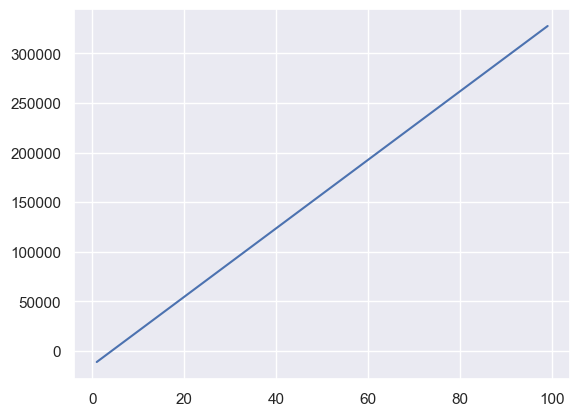

In [220]:
plt.plot(new_input, yhat)
plt.show()

<h3> Принятие решений: определение хорошей модели Fit </h3>


<P> Теперь, когда мы визуализировали различные модели и сгенерировали значения R-Squared и MSE для подгонки, как мы определяем хорошую модель подгонки?
<ul>
    <li> <i> Что такое хорошее значение R-квадрат? </i> </li>
</ul>
</p>

<p> При сравнении моделей <b> модель с более высоким значением R-квадрата лучше подходит для данных.
<ul>
    <li> <i> Что такое хороший mse? </i> </li>
</ul>
</p>

<p> При сравнении моделей <b> модель с наименьшим значением MSE лучше подходит для данных. </p>


<h4> давайте посмотрим на значения для разных моделей. </h4>
<p> Простая линейная регрессия: использование шоссе-MPG в качестве переменной предиктора цены.
<ul>
    <li> r-squared: 0,49659118843391759 </li>
    <li> MSE: 3.16 x10^7 </li>
</ul>
</p>
    
<p> Многочисленная линейная регрессия: использование мощности, бордюр, размер двигателя и шоссе-MPG в качестве предиктора переменных цен.
<ul>
    <li> r-squared: 0,80896354913783497 </li>
    <li> MSE: 1,2 x10^7 </li>
</ul>
</p>
    
<p> Полиномиальная подгонка: использование шоссе-MPG в качестве переменной предиктора цены.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3> Простая модель линейной регрессии (SLR) против нескольких линейной модели регрессии (MLR) </H3>

<p> Обычно, чем больше у вас переменных, тем лучше ваша модель в прогнозировании, но это не всегда верно.Иногда у вас может быть недостаточно данных, вы можете столкнуться с числовыми проблемами, или многие из переменных могут быть бесполезными и даже действовать как шум.В результате вы всегда должны проверять MSE и r^2. </P>

<p> Чтобы сравнить результаты моделей MLR против SLR, мы рассматриваем комбинацию как R-квадрат, так и MSE, чтобы сделать наилучший вывод о соответствии модели.
<ul>
    <li> <b> mse </b>: MSE SLR составляет 3,16x10^7, в то время как MLR имеет MSE 1,2 x10^7.MSE MLR намного меньше. </Li>
    <li> <b> r-squared </b>: в этом случае мы также можем увидеть, что существует большая разница между R-квадратным размером SLR и R-квадратом MLR.R-квадрат для SLR (~ 0,497) очень мал по сравнению с R-квадратом для MLR (~ 0,809). </Li>
</ul>
</p>

Этот R-квадрат в сочетании с MSE показывает, что MLR кажется лучшей моделью в этом случае по сравнению с SLR.


<h3> Простая линейная модель (SLR) против полиномиальной подгонки </h3>


<ul>
    <li> <b> mse </b>: мы видим, что полиномиальная подгонка сбила MSE, поскольку эта MSE меньше, чем у SLR. </li>
    <li> <b> r-squared </b>: R-квадрат для полиномиального прилегаli>
</ul>
<p> Поскольку полиномиальная подгонка привела к более низкому MSE и более высокому R-квадрату, мы можем сделать вывод, что это была лучшая модель соответствия, чем простая линейная регрессия для прогнозирования «цены» с «шоссе-MPG» в качестве переменной предиктора.</p>


<h3> множественная линейная регрессия (MLR) по сравнению с полиномиальной подгонкой </h3>


<ul>
    <li> <b> mse </b>: MSE для MLR меньше MSE для полиномиальной подгонки. </li>
    <li> <b> r-squared </b>: R-квадрат для MLR также намного больше, чем для полиномиальной подгонки. </li>
</ul>

<h2> Заключение </h2>


<p> Сравнивая эти три модели, мы заключаем, что <b> модель MLR является лучшей моделью </b>, чтобы иметь возможность прогнозировать цену из нашего набора данных.Этот результат имеет смысл, так как у нас есть 27 переменных, и мы знаем, что более чем одна из этих переменных является потенциальным предиктором окончательной цены на автомобиль. </P>